## **ETL (Extract, Transform, Loading) for Mudah.my website**

Group 12 🔽

1. Firdanish Rafique bin Mohd Hamid (A182072)
2. Nurbalqis Qistina binti Rosli (A181246)
3. Muhammad Nur Akmal bin Mohamad Razif (A181765)
4. Nur Hazrina Asyikin binti Hamdan (A190375)

### **(1) Extracting : 8 pt**

a. Pick/choose your dataset - make sure it is legal to be scrape.  -1 points

b. scrape your data - identify your data attributes.  (at least 1 attribute per member) -   8 points

c. AT LEAST 100  or  more record of data are collected.  - 1 points

In [ ]:
# Importing all libraries involved
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from csv import writer

In [ ]:
with open('mudah_car.csv', 'w', encoding='utf8', newline='') as f:

  # Creating header for our dataset
  filewriter = writer(f)
  header = ['Name', 'Price', 'Condition', 'Mileage', 'Engine_Capacity', 'Region']
  filewriter.writerow(header)

  # Create a list for every attributes
  lst_carname = []
  lst_carprice = []
  lst_carcond = []
  lst_carmileage = []
  lst_carengine = []
  lst_carregion = []


  # Starts finding attributes

  for i in range(2):

    # Page iterations
    i+=1

    # The value of i will determine the page number of our url
    url = 'https://www.mudah.my/malaysia/cars-for-sale?o=' + str(i)

    mudah_page = requests.get(url)
    mudah_soup = BeautifulSoup(mudah_page.content, 'html.parser')

    div_items = mudah_soup.find_all('div', {'data-testid': True})

    for item in div_items:
      if 'data-testid' in item.attrs:
        if item.attrs['data-testid'].startswith('listing-ad-item-'):

          # finding car names
          name_tag = item.find('img')
          if name_tag and 'alt' in name_tag.attrs:
            lst_carname.append(name_tag.attrs['alt'])

          # finding car prices
          price_tag = item.find('div', string=lambda text: text and 'RM ' in text)
          for price in price_tag:
            lst_carprice.append(price.string.replace('RM ', '').replace(' ', ''))

          # finding car condition
          condition_tag = item.find('div', attrs={'title': 'Condition'})
          for condition in condition_tag:
            if(condition.text != ''):
              lst_carcond.append(condition.text)

          # finding car mileage
          mileage_tag = item.find('div', attrs={'title': 'Mileage'})
          for mileage in mileage_tag:
            if(mileage.text != ''):
              lst_carmileage.append(mileage.text)

          # finding engine capacity
          engine_tag = item.find('div', attrs={'title': 'Engine capacity'})
          for engine in engine_tag:
            if(engine.text != ''):
              lst_carengine.append(engine.text.replace('cc',''))

          # finding region
          region_tag = item.find('span', attrs={'title': 'Region'})
          for region in region_tag:
            if(region.text != ''):
              lst_carregion.append(region.text)

    car_info = list(zip(lst_carname, lst_carprice, lst_carcond, lst_carmileage, lst_carengine, lst_carregion))
    filewriter.writerows(car_info)

  f.close()

### **(2) Transform - 8 pt**

a. perform any necessary data processing - ( at least 4 types of data processing or more if the member in your group more than 4).

b. perform any data visualisation ( e.g before and after data cleaning)

~ Data Observation ~

In [ ]:
df_mudah = pd.read_csv('mudah_car.csv')
df_mudah.head()

,Name,Price,Condition,Mileage,Engine_Capacity,Region
0,2014-Ford RANGER 2.2 XLT 4WD(A)Kedai/Bank/Cash,56990,Used,75000 - 79999,2198,Selangor
1,FULL LOAN Toyota VIOS 1.5 TRD SPORTIVO (A) LEA...,42999,Used,95000 - 99999,1497,Johor
2,FULL LOAN Toyota VIOS 1.5 TRD SPORTIVO (A),40999,Used,85000 - 89999,1497,Johor
3,FULL LOAN Honda CIVIC 2.0 (A) FULL LEATHER,48999,Used,95000 - 99999,1997,Johor
4,FULL LOAN Nissan X-TRAIL 2.0 (A) LEATHER SEAT,58999,Used,85000 - 89999,1997,Johor


In [ ]:
df_mudah.shape

(120, 6)

In [ ]:
# Checking data types for attributes
df_mudah.dtypes

Name               object
Price               int64
Condition          object
Mileage            object
Engine_Capacity     int64
Region             object
dtype: object

In [ ]:
df_mudah.isna().sum()

Name               0
Price              0
Condition          0
Mileage            0
Engine_Capacity    0
Region             0
dtype: int64

~ Data Processing ~

In [ ]:
# Duplicating dataframe
df_mudah_cleaned = df_mudah
df_mudah_cleaned.head()

,Name,Price,Condition,Mileage,Engine_Capacity,Region
0,2014-Ford RANGER 2.2 XLT 4WD(A)Kedai/Bank/Cash,56990,Used,75000 - 79999,2198,Selangor
1,FULL LOAN Toyota VIOS 1.5 TRD SPORTIVO (A) LEA...,42999,Used,95000 - 99999,1497,Johor
2,FULL LOAN Toyota VIOS 1.5 TRD SPORTIVO (A),40999,Used,85000 - 89999,1497,Johor
3,FULL LOAN Honda CIVIC 2.0 (A) FULL LEATHER,48999,Used,95000 - 99999,1997,Johor
4,FULL LOAN Nissan X-TRAIL 2.0 (A) LEATHER SEAT,58999,Used,85000 - 89999,1997,Johor


In [ ]:
# Changing object attribute to String
df_mudah_cleaned['Name'] = df_mudah_cleaned['Name'].astype('string')
df_mudah_cleaned['Condition'] = df_mudah_cleaned['Condition'].astype('string')
df_mudah_cleaned['Mileage'] = df_mudah_cleaned['Mileage'].astype('string')
df_mudah_cleaned['Region'] = df_mudah_cleaned['Region'].astype('string')

df_mudah_cleaned.dtypes

Name               string
Price               int64
Condition          string
Mileage            string
Engine_Capacity     int64
Region             string
dtype: object

In [ ]:
# Replacing data in Condition into numeric
df_mudah_cleaned['Condition'].replace(['New', 'Used', 'Recon'], [0, 1, 2], inplace=True)

In [ ]:
# Separating Mileage into starting mileage range and end mileage range
df_mudah_cleaned[['startMile', 'endMile']] = df_mudah_cleaned.Mileage.str.split(" - ", expand = True)
df_mudah_cleaned[['startMile', 'endMile']] = df_mudah_cleaned[['startMile', 'endMile']].astype(int)

# Dropping Mileage attribute
df_mudah_cleaned = df_mudah_cleaned.drop("Mileage", axis=1)

In [ ]:
df_mudah_cleaned.dtypes

Name               string
Price               int64
Condition           int64
Engine_Capacity     int64
Region             string
startMile           int64
endMile             int64
dtype: object

**~ Data Visualization ~**

In [ ]:
import matplotlib.pyplot as plt

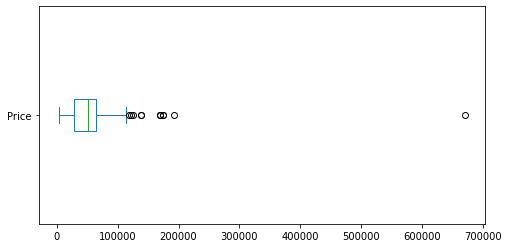

In [ ]:
# Price range of a car
df_mudah_cleaned['Price'].plot(kind='box', vert=False, figsize=(8,4))

Text(0, 0.5, 'Number of Cars')

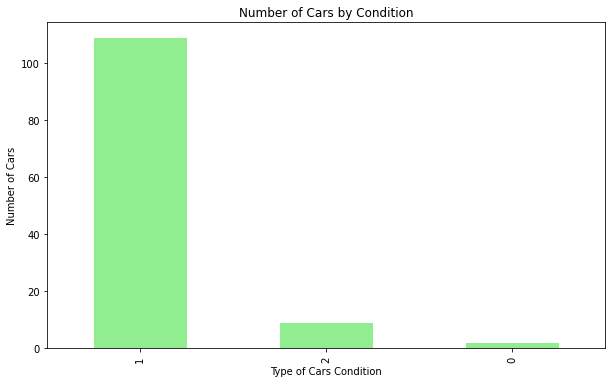

In [ ]:
# Cars condition
df_mudah_cleaned['Condition'].value_counts().plot(kind='bar' , figsize=(10, 6), color='lightgreen')
plt.title('Number of Cars by Condition')
plt.xlabel('Type of Cars Condition')
plt.ylabel('Number of Cars')

Text(0, 0.5, 'Number of Cars')

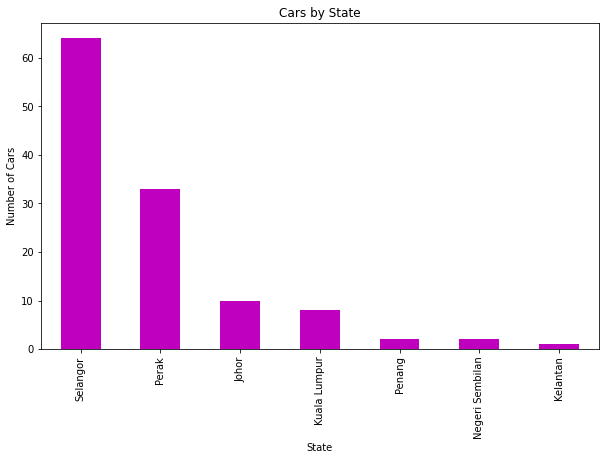

In [ ]:
# Cars region
df_mudah_cleaned['Region'].value_counts().plot(kind='bar', figsize=(10, 6), color='m')
plt.title('Cars by State')
plt.xlabel('State')
plt.ylabel('Number of Cars')

Text(0.5, 1.0, 'Boxplot for Engine Capacity')

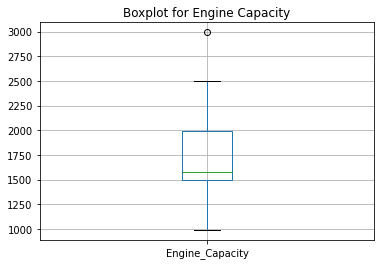

In [ ]:
#Engine Capacity

df_mudah.boxplot(column='Engine_Capacity')
plt.title("Boxplot for Engine Capacity")

### **Load - 2 pt**

Save your clean data into any types of file ( e.g .csv ) that can be read by pandas.

In [ ]:
df_mudah_cleaned.to_csv('cleaned_mudah_car.csv', mode='w', index=False, header=True)